In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
tickers=['QQQ', 'MSFT', 'AMZN']

data=yf.download(tickers, start='2020-01-01', end='2022-01-01')['Adj Close']

[*********************100%***********************]  3 of 3 completed


In [8]:
benchmark_returns=data.QQQ.pct_change().dropna()

In [9]:
benchmark_returns

Date
2020-01-03   -0.009160
2020-01-06    0.006443
2020-01-07   -0.000139
2020-01-08    0.007516
2020-01-09    0.008473
                ...   
2021-12-27    0.016527
2021-12-28   -0.004635
2021-12-29   -0.000149
2021-12-30   -0.002988
2021-12-31   -0.006244
Name: QQQ, Length: 504, dtype: float64

In [10]:
#Construct portfolios

msft_size = data.MSFT * 50
amzn_size = data.AMZN * 50

In [11]:
portfolio_value = msft_size + amzn_size
portfolio_pnl = (msft_size - msft_size.shift()) + (amzn_size - amzn_size.shift())
portfolio_returns = (portfolio_pnl / portfolio_value)
portfolio_returns.name = 'Port'

In [12]:
portfolio_value

Date
2020-01-02    12552.622986
2020-01-03    12397.804642
2020-01-06    12487.508392
2020-01-07    12426.974487
2020-01-08    12511.760330
                  ...     
2021-12-27    25447.024536
2021-12-28    25437.155914
2021-12-29    25398.831940
2021-12-30    25240.727234
2021-12-31    24995.745087
Length: 505, dtype: float64

In [14]:
portfolio_pnl

Date
2020-01-02           NaN
2020-01-03   -154.818344
2020-01-06     89.703751
2020-01-07    -60.533905
2020-01-08     84.785843
                 ...    
2021-12-27    314.447784
2021-12-28     -9.868622
2021-12-29    -38.323975
2021-12-30   -158.104706
2021-12-31   -244.982147
Length: 505, dtype: float64

In [17]:
portfolio_returns

Date
2020-01-02         NaN
2020-01-03   -0.012488
2020-01-06    0.007183
2020-01-07   -0.004871
2020-01-08    0.006776
                ...   
2021-12-27    0.012357
2021-12-28   -0.000388
2021-12-29   -0.001509
2021-12-30   -0.006264
2021-12-31   -0.009801
Name: Portfolio, Length: 505, dtype: float64

In [16]:
portfolio_returns.name = 'Portfolio'

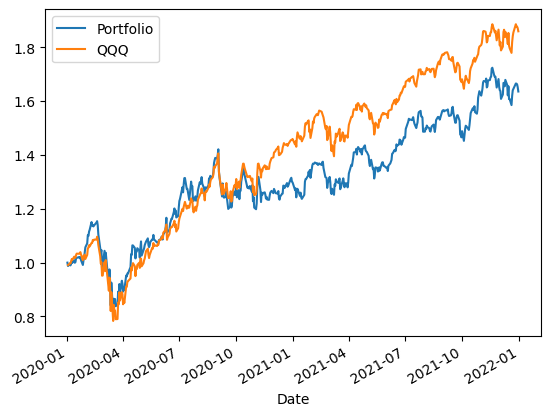

In [19]:
#Plot cummulative portfolio v. benchmark return

portfolio_cum_returns = (portfolio_returns.fillna(0.0) + 1).cumprod()
benchmark_cum_returns = (benchmark_returns.fillna(0.0) + 1).cumprod()

pd.concat([portfolio_cum_returns, benchmark_cum_returns], axis=1).plot()
plt.show()

In [20]:
def information_ratio(portfolio_returns, benchmark_returns):
    active_return = portfolio_returns - benchmark_returns
    tracking_error = active_return.std()
    return active_return.mean() / tracking_error

In [23]:
information_ratio(portfolio_returns, benchmark_returns)

-0.03139060124785823

# If the above result is negative it means the portfolio is not generating excess returns in relation to the benchamrk